In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [3]:
df=pd.read_csv('weatherHistory.csv')

In [4]:

# Preprocess the data
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
df.set_index('Formatted Date', inplace=True)


/var/folders/k9/2v1n2cw97z5_1vftpp8ft2br0000gn/T/ipykernel_54421/4085451624.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])


In [5]:
# Select relevant features and target variable
features = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Bearing (degrees)', 'Pressure (millibars)']
X = df[features]
y = df['Wind Speed (km/h)']

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [7]:

# Train XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:

# Make predictions with XGBoost model
xgb_predictions = xgb_model.predict(X_test)


In [9]:

# Calculate RMSE for XGBoost
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))


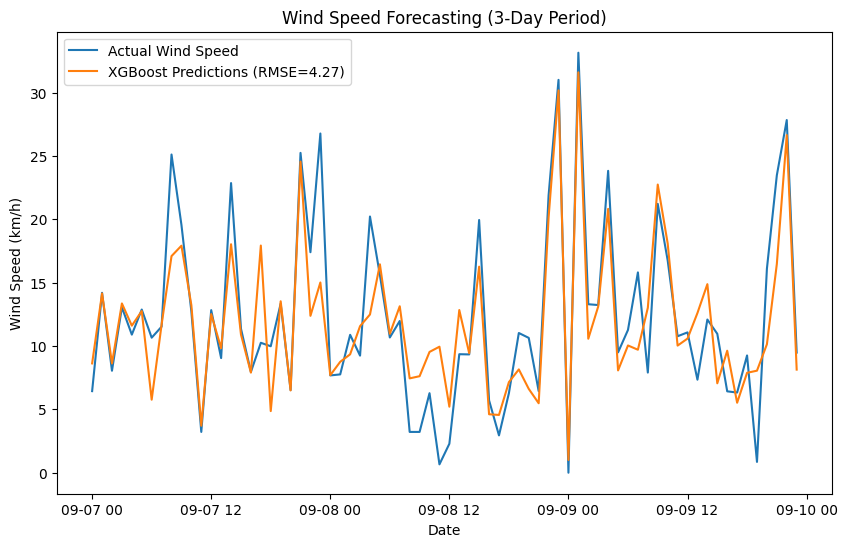

RMSE for XGBoost: 4.267792987946749


In [12]:
num_data_points = 3 * 24  # Assuming hourly data, so 3 days * 24 hours/day

plt.figure(figsize=(10, 6))
plt.plot(df.index[-num_data_points:], y_test[-num_data_points:], label='Actual Wind Speed')
plt.plot(df.index[-num_data_points:], xgb_predictions[-num_data_points:], label='XGBoost Predictions (RMSE={:.2f})'.format(xgb_rmse))
plt.title('Wind Speed Forecasting (3-Day Period)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.show()

print("RMSE for XGBoost:", xgb_rmse)
